### Activate inline plotting

In [2]:
%pylab inline
import sys
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


### Loading data

In [3]:
from data import Dataset

In [4]:
dataset = Dataset('../data/signal_TDR.root')

### Positions of wires

In [5]:
rhos, phis = dataset.get_wires_rhos_and_phis()

In [6]:
rhos

array([ 53. ,  53. ,  53. , ...,  80.2,  80.2,  80.2])

### Energy deposits

In [7]:
dataset.get_energy_deposits(event_id=0)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

### Benchmarking the time needed to load all the events

In [8]:
dataset.n_events

3445

In [9]:
%%time
for i in range(dataset.n_events):
    z = dataset.get_energy_deposits(i)

CPU times: user 118 ms, sys: 799 µs, total: 119 ms
Wall time: 117 ms


### Drawing

In [10]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)    

AttributeError: 'Dataset' object has no attribute 'neighbours_table'

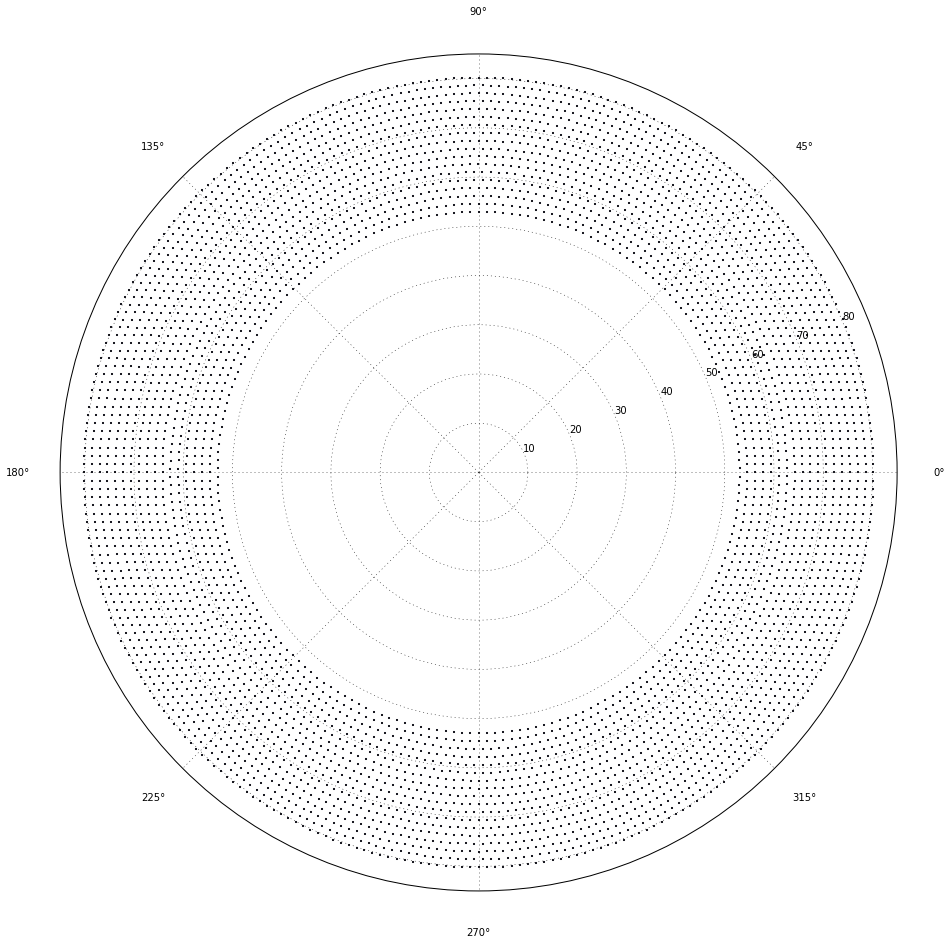

In [11]:
from scipy.sparse import *
setup_plot_for_detector()
scatter(phis, rhos, marker='.', s=5)

wire1 = 1110
neigh1 = find(dataset.neighbours_table[wire1,:])[1]
scatter(phis[neigh1],rhos[neigh1], marker='o', c='b')
scatter(phis[wire1],rhos[wire1], marker='o', c='r')

### Drawing deposited energies

In [ ]:
e_cut = 0.000005
phi_win = math.pi/2.

avg_e_sig_half = np.zeros(dataset.n_events)
avg_e_bg_half = np.zeros(dataset.n_events)

for event in range(dataset.n_events):
    pass_e_cut_sg = where( (dataset.get_hit_types(event) == 1) & 
                        (dataset.get_energy_deposits(event_id=event) < e_cut) )

    first_phi = min(phis[pass_e_cut_sg])

    sig_half   = where( (dataset.get_hit_types(event) != 0) & 
                        (dataset.get_energy_deposits(event_id=event) < e_cut) & 
                         ( (phis - first_phi)%(2*math.pi) < phi_win )          )

    bg_half   = where( (dataset.get_hit_types(event) != 0) & 
                        (dataset.get_energy_deposits(event_id=event) < e_cut) & 
                         ( (phis - first_phi)%(2*math.pi) > phi_win )          )

    e_dep_sig_half = dataset.get_energy_deposits(event)[sig_half]
    avg_e_sig_half[event] = sum(e_dep_sig_half)/len(e_dep_sig_half)
    

    e_dep_bg_half = dataset.get_energy_deposits(event)[bg_half]
    avg_e_bg_half[event] = sum(e_dep_bg_half)/len(e_dep_bg_half)

figsize(10,10)
plt.xticks(label='Average Energy Deposition', fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('Average Energy Deposition (KeV)', fontsize='xx-large')
plt.ylabel('Events', fontsize='xx-large')
plt.hist(avg_e_sig_half,bins=50,histtype='step',label="BG Region")
plt.hist(avg_e_bg_half,bins=50,histtype='step',label="SG Region")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize='xx-large')

## Drawing deposits and labels 

In [ ]:
for event_id in [1, 4, 5]:
    setup_plot_for_detector()
    scatter(phis, rhos, dataset.get_energy_deposits(event_id=event_id) * 30000)
    show()

Populating the interactive namespace from numpy and matplotlib


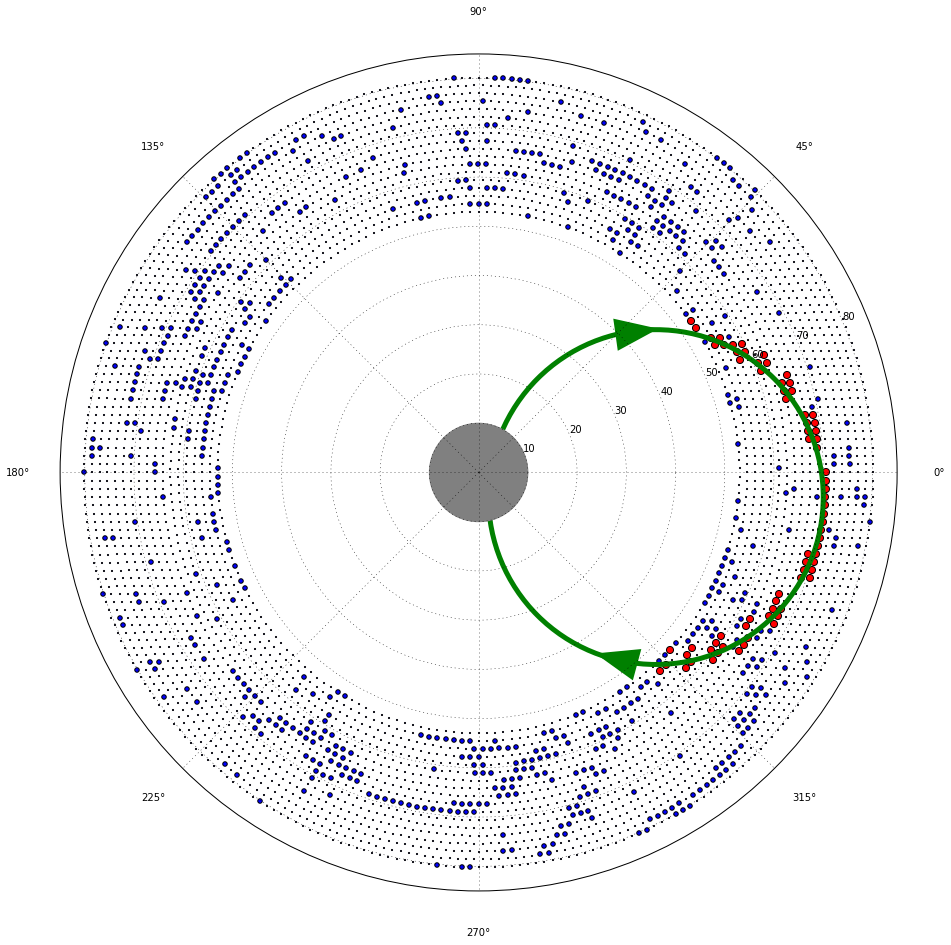

In [23]:
%pylab inline
import sys
sys.path.insert(0, '..')
from data import Dataset
dataset = Dataset('../data/signal_TDR.root')
rhos, phis = dataset.get_wires_rhos_and_phis()

evt = 1


def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)    
    
setup_plot_for_detector()
ax = plt.subplot(111, polar=True)
sg = where(dataset.get_hit_types(evt) == 1)[0]
bg = where(dataset.get_hit_types(evt) == 2)[0]

target_spread = plt.Circle((36, -5), 34, \
                           transform=ax.transData._b, color="green", fill=False, lw=5)
gca().add_artist(target_spread)


ax.scatter(phis, rhos, marker='.', s=5)
ax.scatter(phis[bg], rhos[bg], marker='o', c='b')
ax.scatter(phis[sg], rhos[sg], marker='o', c='r',s=50)

target_spread = plt.Circle((0, 0), 10, \
                           transform=ax.transData._b, color="grey")
gca().add_artist(target_spread)

arr = plt.arrow(28, 28, 0.01, 0.0014,  edgecolor = 'green', 
                facecolor = 'green',lw=2, transform=ax.transData._b, head_length=8, head_width=6) 
arr = plt.arrow(32, -39, -0.01, 0.0027,  edgecolor = 'green', 
                facecolor = 'green',lw=2, transform=ax.transData._b, head_length=8, head_width=6) 


In [1]:
import matplotlib.lines as lines
ax = plt.subplot(111)

figsize(8,8)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

#plt.axis('off')

angle = 2.4
room = 0.2
even_x, odd_x = [], []

for offset in range(40):
    offset -= 10
    ax.add_line(Line2D([offset,offset+angle], [0-room,10+room], lw=2, color='red', ls="--"))
    even_x.append(offset)
    ax.add_line(Line2D([offset+angle,offset], [0-room,10+room], lw=2, color='blue'))
    odd_x.append(offset+angle)

x_1 = 14
ax.plot(x_1+0.2, 9.4, color='DarkOrange',marker='.', markersize=30.0)
ax.add_line(Line2D([x_1-2,x_1-2+angle], [0-room,10.+room], lw=15, color='DarkOrange', alpha=0.3))
ax.add_line(Line2D([x_1+angle,x_1], [0-room,10+room], lw=15, color='DarkOrange', alpha=0.3))
    
x_2 = 8    
ax.plot(x_2+1.2, 5, 'g.', markersize=30.0)
ax.add_line(Line2D([x_2,x_2+angle], [0-room,10.+room], lw=15, color='green', alpha=0.3))
ax.add_line(Line2D([x_2+angle,x_2], [0-room,10+room], lw=15, color='green', alpha=0.3))

x_3 = 3
ax.plot(x_3 + 0.2, 0.6, '.', color='purple', markersize=30.0)
ax.add_line(Line2D([x_3,x_3+angle], [0-room,10+room], lw=15, color='purple', alpha=0.3))
ax.add_line(Line2D([x_3 - 2+angle,x_3-2], [0-room,10+room], lw=15, color='purple', alpha=0.3))


ax.set_xlim(0,17)
ax.set_xlabel("Location in X [cm]", fontsize=15)
ax.set_ylim(-room,10+room)
ax.set_yticks([0,0.6, 5,9.2,10])
ax.set_yticklabels(["0","0.6", "5","9.2","10"])
ax.grid(axis='y', color='black', alpha=1, ls='--')
ax.set_ylabel("Location in Z [cm]", fontsize=15)
ax.set_title("X-Z Projection of Wire Array At Y=90")
savefig(save_dir+"stereo_x_z.png", bbox_inches="tight")

ax.plot()
show()

ax = plt.subplot(111)
ax.set_ylim(43,90)
ax.set_xlim(0,17)
layers = np.arange(0,18)
layers += 0.046
even_layers = layers[::2]
odd_layers = layers[1::2] + 0.4

even_y = np.zeros(len(even_x)) +53
odd_y = np.zeros(len(even_x)) + 1.6 +53


for even_l, odd_l in zip(even_layers, odd_layers):
    ax.scatter(even_x, even_y, color="red")
    ax.scatter(odd_x, odd_y, color="blue")
    ax.plot(3, even_y[0], '.', color='purple', markersize=30.0, alpha=0.4)
    ax.plot(3.4, odd_y[0], '.', color='purple', markersize=30.0, alpha=0.4)
    ax.plot(8, even_y[0], '.', color='green', markersize=30.0, alpha=0.4)
    ax.plot(10.4, odd_y[0], '.', color='green', markersize=30.0, alpha=0.4)
    
    ax.plot(12, even_y[0], '.', color='DarkOrange', markersize=30.0, alpha=0.6)
    ax.plot(16.4, odd_y[0], '.', color='DarkOrange', markersize=30.0, alpha=0.6)
    
    even_y += 3.2
    odd_y += 3.2

ax.add_line(Line2D([14.2,14.2], [0,50], lw=5, color='DarkOrange'))
ax.add_line(Line2D([14.2,14.2], [82,88], lw=5, color='DarkOrange'))
arr = plt.arrow(14.2, 49, 0, 1,  edgecolor = 'DarkOrange', facecolor = 'DarkOrange',lw=2, 
           head_length=1, head_width=0.5) 
arr = plt.arrow(14.2, 87, 0, 1,  edgecolor = 'DarkOrange', facecolor = 'DarkOrange',lw=2, 
           head_length=1, head_width=0.5) 


ax.add_line(Line2D([9.2,9.2], [0,50], lw=5, color='green'))
ax.add_line(Line2D([9.2,9.2], [82,88], lw=5, color='green'))
arr = plt.arrow(9.2, 49, 0, 1,  edgecolor = 'green', facecolor = 'green',lw=2, 
           head_length=1, head_width=0.5) 
arr = plt.arrow(9.2, 87, 0, 1,  edgecolor = 'green', facecolor = 'green',lw=2, 
           head_length=1, head_width=0.5) 


ax.add_line(Line2D([3.2,3.2], [0,50], lw=5, color='purple'))
ax.add_line(Line2D([3.2,3.2], [82,88], lw=5, color='purple'))
arr = plt.arrow(3.2, 49, 0, 1,  edgecolor = 'purple', facecolor = 'purple',lw=2, 
           head_length=1, head_width=0.5) 
arr = plt.arrow(3.2, 87, 0, 1,  edgecolor = 'purple', facecolor = 'purple',lw=2, 
           head_length=1, head_width=0.5) 

#ax.add_line(Line2D([odd_l,odd_l], [7,10], lw=2, color='green'))
#ax.add_line(Line2D([12.1,12.1], [0,3], lw=2, color='purple'))
#ax.add_line(Line2D([12.1,12.1], [7,10], lw=2, color='purple'))
#ax.plot(8, 4, '.', color='purple', markersize=30.0, alpha=0.2)
#ax.plot(8.2, 6, '.', color='purple', markersize=30.0, alpha=0.2)
ax.set_xlabel("Location in X [cm]", fontsize=15)
ax.set_ylabel("Location in Y [cm]", fontsize=15)
ax.set_title("X-Y Projection of Wire Array At Z=0")
savefig(save_dir+"stereo_x_y.png", bbox_inches="tight")

ax.plot()
show()

NameError: name 'plt' is not defined